In [ ]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
import scipy as sp
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## Kmeans(군집분석) 
** 비지도 학습, 비슷한 특성끼리 클러스터로

1. 사용자가 군집의 개수를 지정 (k값)
2. 랜덤으로 k개의 중심을 설정
3. 각각의 데이터를 가까운 중심점에 할당
4. 각 클러스터의 평균 위치를 새로운 중심점으로 이동
5. 중심점이 더 이상 움직이지 않을 때까지 반복하여 클러스터 완성

In [5]:
customer = pd.read_csv("../../data/customer_join4.csv")
customer.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
calc_date           0
membership          0
dtype: int64

In [6]:
## 항목추출
customer_clustering = customer[["mean", "median","max", "min", "membership"]]
customer_clustering

,mean,median,max,min,membership
0,4.833333,5.0,8,2,46
1,5.083333,5.0,7,3,46
2,4.583333,5.0,6,3,46
3,4.833333,4.5,7,2,46
4,3.916667,4.0,6,1,46
...,...,...,...,...,...
4187,8.000000,8.0,8,8,0
4188,10.000000,10.0,10,10,0
4189,8.000000,8.0,8,8,0
4190,11.000000,11.0,11,11,0


In [7]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering) 
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.04709147],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.04709147],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.04709147],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.3350627 ],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.3350627 ],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.3350627 ]],
      shape=(4192, 5))

In [9]:
#  회원 그룹화 진행 (K평균 군집화)
kmeans = KMeans(n_clusters=4, random_state=0)  ###  클러스터링 모델구축 (그룹 4개로 지정)
clusters = kmeans.fit(customer_clustering_sc)  ###  클러스터링 실행
customer_clustering["cluster"] = clusters.labels_   ###  새로운 항목에 클러스터링 결과 저장

In [10]:
print(customer_clustering["cluster"].unique())   ## 데이터 그룹 번호 확인
customer_clustering   ## 그룹 적용된 데이터 확인

[2 1 0 3]


,mean,median,max,min,membership,cluster
0,4.833333,5.0,8,2,46,2
1,5.083333,5.0,7,3,46,2
2,4.583333,5.0,6,3,46,2
3,4.833333,4.5,7,2,46,2
4,3.916667,4.0,6,1,46,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,0,3
4188,10.000000,10.0,10,10,0,3
4189,8.000000,8.0,8,8,0,3
4190,11.000000,11.0,11,11,0,3


In [11]:
customer_clustering.to_csv("../../data/customer_clustering.csv", index=False)

In [13]:
df = pd.read_csv('../../data/customer_clustering.csv')
df.head(2)

,mean,median,max,min,membership,cluster
0,4.833333,5.0,8,2,46,2
1,5.083333,5.0,7,3,46,2


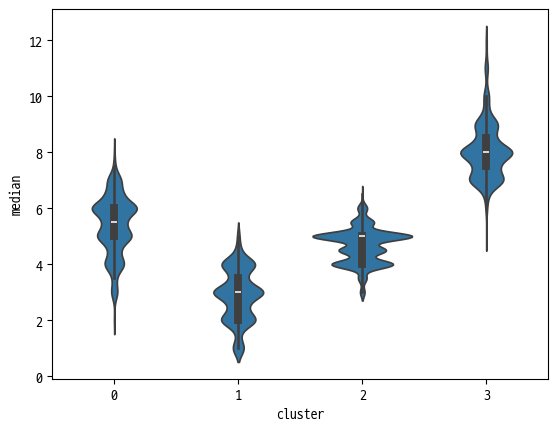

In [15]:
## 바이올린 그래프 
sns.violinplot(x='cluster', y='median', data=df) 
plt.savefig("../../data/v1.png")

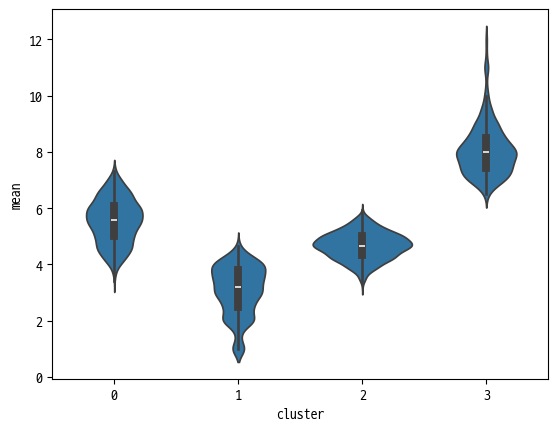

In [17]:
## 바이올린 그래프 
sns.violinplot(x='cluster', y='mean', data=df) 
plt.show()

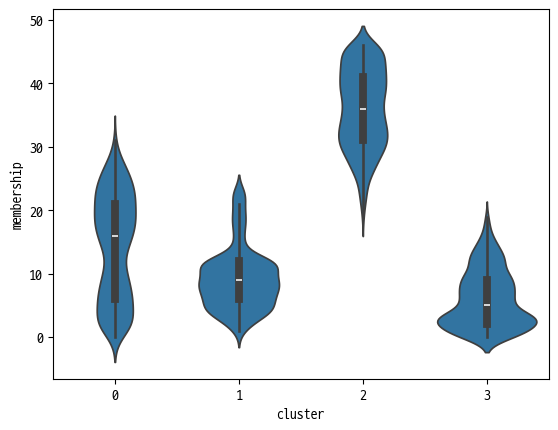

In [18]:
## 바이올린 그래프 
sns.violinplot(x='cluster', y='membership', data=df) 
plt.show()

<Axes: xlabel='cluster', ylabel='max'>

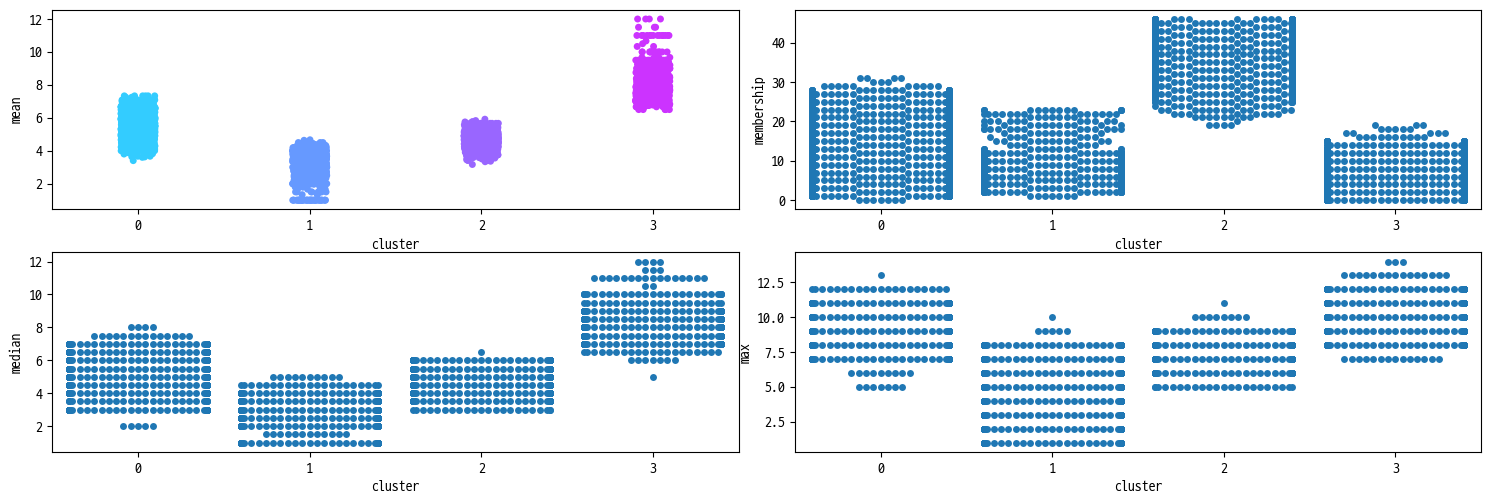

In [19]:
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.tight_layout()

sns.stripplot(x="cluster",   y="mean",   data=df, ax=ax1, palette='cool')  

sns.swarmplot(x="cluster",   y="membership",  data=df,   ax=ax2)   
sns.swarmplot(x="cluster",   y="median",  data=df,   ax=ax3)   
sns.swarmplot(x="cluster",   y="max",  data=df,   ax=ax4)

In [20]:
df.columns = ["월평균값","월중앙값", "월최대값", "월최소값","회원기간", "cluster"]
df

,월평균값,월중앙값,월최대값,월최소값,회원기간,cluster
0,4.833333,5.0,8,2,46,2
1,5.083333,5.0,7,3,46,2
2,4.583333,5.0,6,3,46,2
3,4.833333,4.5,7,2,46,2
4,3.916667,4.0,6,1,46,2
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,0,3
4188,10.000000,10.0,10,10,0,3
4189,8.000000,8.0,8,8,0,3
4190,11.000000,11.0,11,11,0,3


In [21]:
df.groupby("cluster").count()

,월평균값,월중앙값,월최대값,월최소값,회원기간
cluster,,,,,
0,1346,1346,1346,1346,1346
1,768,768,768,768,768
2,1243,1243,1243,1243,1243
3,835,835,835,835,835


In [22]:
df.groupby("cluster").mean()

,월평균값,월중앙값,월최대값,월최소값,회원기간
cluster,,,,,
0,5.545969,5.395988,8.757058,2.712481,14.355869
1,3.062374,2.895833,4.776042,1.649740,9.234375
2,4.668605,4.664924,7.227675,2.142397,35.951730
3,8.067802,8.053892,10.010778,6.189222,6.005988
